In [ ]:
# Installing the required modules
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [ ]:
# Installing the CPU and CUDA
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install easyocr

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# Importing the different libraries
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [ ]:
# Optional by defining the path of each images
img0_path = '/content/text0.jpg'
img1_path = '/content/text1.jpg'
img2_path = '/content/text2.jpg'
img3_path = '/content/text3.jpg'
img4_path = '/content/text4.jpg'
img5_path = '/content/text5.jpg'
img6_path = '/content/text6.png'
img7_path = '/content/text7.png'
img8_path = '/content/text8.jpg'
img9_path = '/content/text9.png'
img10_path = '/content/text11.jpg'

In [ ]:
# Extracting the path of images one by one in the form of list
img_path = "/content/"
create_path = lambda f : os.path.join(img_path, f)
test_image_files = os.listdir(img_path)

for f in test_image_files:
    print(f)

.config
text11.jpg
.ipynb_checkpoints
sample_data


In [ ]:
# loading the path of image by passing the position of the image
img = test_image_files[1]
path = create_path(img)

In [ ]:
# Recognise the text
def recognize_text(img_path):
    ''' loads an image and recognizes text. '''

    reader = easyocr.Reader(['en'])        # For English - 'en'  And,  For Hindi - 'hi'
    return reader.readtext(img_path)

In [ ]:
result = recognize_text(path)

In [ ]:
result

[([[117, 41], [372, 41], [372, 67], [117, 67]],
  'Computer Science Essay Topics',
  0.9867208015893012),
 ([[64, 86], [126, 86], [126, 94], [64, 94]], 'CmlmmGal', 0.04255817229920638),
 ([[140, 86], [180, 86], [180, 94], [140, 94]],
  'Inc Hnice',
  0.05226666574212913),
 ([[180, 82], [265, 82], [265, 96], [180, 96]],
  '0f "€oxnpules Sclence',
  0.10332920830331119),
 ([[290, 86], [334, 86], [334, 94], [290, 94]],
  'Vopic " Cail',
  0.07434181983577112),
 ([[344, 86], [408, 86], [408, 94], [344, 94]],
  'Inolh eulicuzine',
  0.029428371992167055),
 ([[64, 96], [116, 96], [116, 104], [64, 104]],
  'Jd WitZWDL',
  0.1341137326174834),
 ([[120, 96], [312, 96], [312, 104], [120, 104]],
  'Tbc (cali 0l coinnila  Clcrar Lr1y mnd cun uolk',
  0.005298586677680276),
 ([[316, 96], [348, 96], [348, 104], [316, 104]],
  'ctolvint',
  0.19722605746736568),
 ([[352, 98], [410, 98], [410, 104], [352, 104]],
  'CLMDIELAAAMSi',
  0.0029884651936850064),
 ([[64, 108], [126, 108], [126, 114], [64, 11

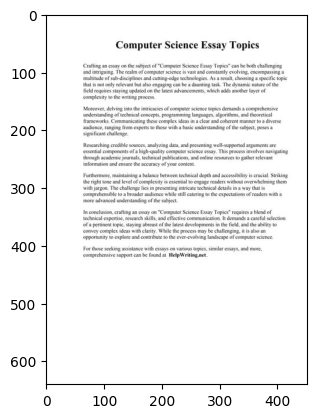

In [ ]:
# Showing the current(Selected) image
img_1 = cv2.imread(path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

In [ ]:
def overlay_ocr_text(img_path, save_name):
    ''' loads an image, recognize text, and overlays the tet on the image. '''

    # Load images
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)

    # Recognise text
    result = recognize_text(img_path)

    # If OCR prob is over 0.2, overlay bounding box and text
    for(bbox, text, prob) in result:
        if prob >= 0.2:
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255,0,0), thickness=10)

            # put recogized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,0,0), thickness=8)

    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'/content/{save_name}_overlay.jpg', bbox_inches='tight')

Detected text: Computer Science Essay Topics (Probability: 0.99)
Detected text: Aluorhm (Probability: 0.53)
Detected text: chulletge (Probability: 0.33)
Detected text: niutc (Probability: 0.30)


<Figure size 640x480 with 0 Axes>

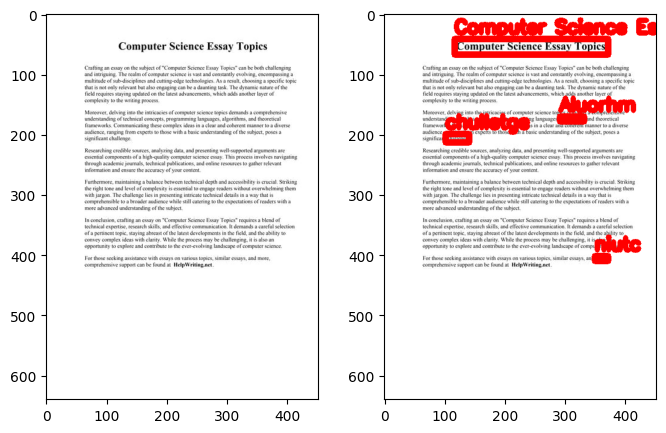

In [ ]:
overlay_ocr_text(path, 'Text11_Output')

In [ ]:
# Extracting the text from image
# overlay_ocr_text(img1_path, 'cheque')

In [ ]:
#ocr_text(img2_path, 'cheque')

In [ ]:
#overlay_ocr_text(img6_path, 'Name of the Signature')

In [ ]:
#overlay_ocr_text(img5_path, 'Date Detection')

In [ ]:
#overlay_ocr_text(img4_path, 'Price Detection')

In [ ]:
# Extracting text from the image
def ocr_text(img_path):

    result = recognize_text(img_path)

    # If OCR prob is over 0.2, overlay text
    for(bbox, text, prob) in result:
        if prob:
            print(f'{text}')

In [ ]:
# Extracted Text
ocr_text(path)

Computer Science Essay Topics
CmlmmGal
Inc Hnice
0f "€oxnpules Sclence
Vopic " Cail
Inolh eulicuzine
Jd WitZWDL
Tbc (cali 0l coinnila  Clcrar Lr1y mnd cun uolk
ctolvint
CLMDIELAAAMSi
MmM Mh
luice alld culils cucc [ocholonct
Ciaking
#ccilic Iojc
Ihal /
onke tclctanibul ukn cOLizieca
Lunlmz Lil
TktrainIc maLurc ufIbz
lel tciulites
KAHA
FIhc |lesl Aancen ILs _ #hich uads Anwwhct Laver 0
clnictuit
uiucutctUclvmn
inuicucecW conipueci Scictcc [uzlit 5 dcuutal
cumniclicuutc
unLcnLdIGWecnmci cICCDADMEMMnut
Lnzulc_
Aluorhm
Je tlcuretcii
Hunnurt
Comnunicllz (nex coinnic Idcalin 4 clenr unu cuneren Ialinzr Ly Lterc
Auclencl AZIn
tom cincrtalu ltt Wlhabiuc ulldcreJnoduz ul tle suherct
Detd
Kani
chulletge
Kocucltg Ercuiblc SOUICCS  alalyaIRg
unu nIC cIlilis
wcll-supaxxicu atgunicnla Irc
exsentisl compoacIis of a high-quality Covnpulee scicieeG5y
Ine} nOrteunsnnlikoinc
Ihroueh IcLcnuc mumle tachnica| nuhlicntionz 4nd onlim [cnunar
Bather relelint
ntnrENmP
CCnE
MCCuDcy urennicni
FunhzTce,
ecleleen le

In [ ]:
from difflib import SequenceMatcher

def calculate_accuracy(detected_text, ground_truth):
    """
    Calculate accuracy using SequenceMatcher for text similarity.
    :param detected_text: OCR-detected text
    :param ground_truth: The actual (expected) text
    :return: Accuracy percentage
    """
    matcher = SequenceMatcher(None, detected_text, ground_truth)
    return matcher.ratio() * 100  # Return similarity as a percentage


In [ ]:
ground_truth = "Your expected text here"

In [ ]:
def ocr_text_with_accuracy(img_path, ground_truth):
    result = recognize_text(img_path)
    detected_text = " ".join([text for (_, text, prob) in result if prob >= 0.2])  # Combine detected words with sufficient probability

    print("OCR-detected text:", detected_text)
    print("Ground truth:", ground_truth)

    # Calculate accuracy
    accuracy = calculate_accuracy(detected_text, ground_truth)
    print(f"Accuracy: {accuracy:.2f}%")


In [ ]:
ground_truth_text = "depends on characters text from the image"
ocr_text_with_accuracy(path, ground_truth_text)


OCR-detected text: Computer Science Essay Topics Aluorhm chulletge niutc
Ground truth: depends on characters text from the image
Accuracy: 23.40%
